In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [3]:
# Step 2: Load Excel Dataset
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name=1)
df.head(10)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [4]:
df.shape

(3999, 12)

In [5]:
# Step 3: Basic EDA
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
# Optional: Drop ID column
df = df.drop(columns=['ID#'], errors='ignore')  # just in case it's there


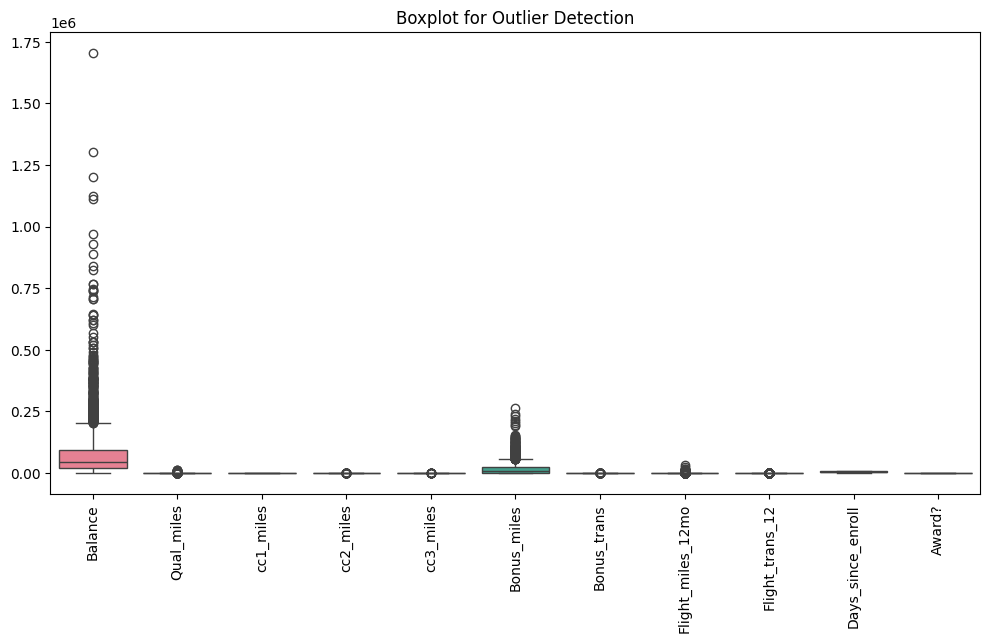

In [9]:
# Step 4: Outlier & Distribution Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()


In [10]:
# Step 5: Scaling the Data
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Apply scaling only on numeric data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)


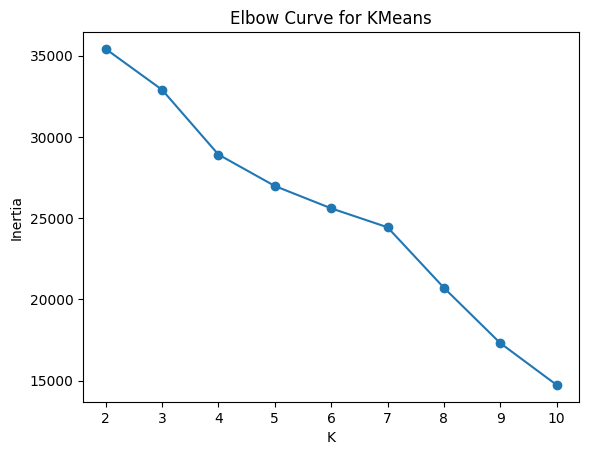

In [11]:
# Step 6: Elbow Method to find optimal K
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Curve for KMeans")
plt.show()


In [ ]:
# Step 7: Apply KMeans with optimal K
kmeans = KMeans(n_clusters=4, random_state=42)  
kmeans_labels = kmeans.fit_predict(scaled_df)

df['KMeans_Cluster'] = kmeans_labels


In [13]:
# Step 8: KMeans Evaluation
score_kmeans = silhouette_score(scaled_df, kmeans_labels)
print("Silhouette Score (KMeans):", score_kmeans)


Silhouette Score (KMeans): 0.19071186813310886


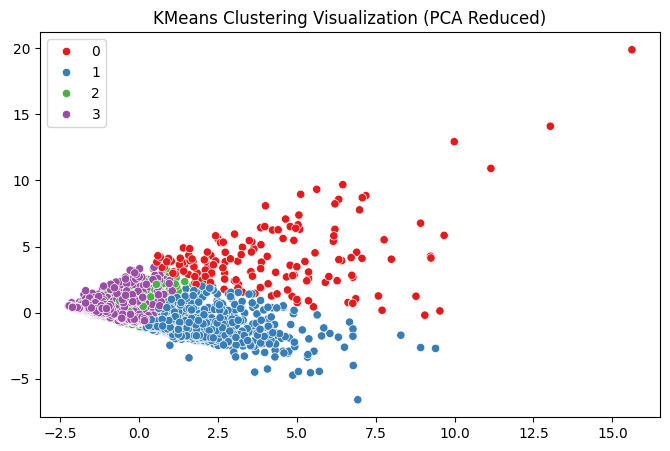

In [14]:
# KMeans Cluster Visualization (PCA for 2D reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans_labels, palette='Set1')
plt.title("KMeans Clustering Visualization (PCA Reduced)")
plt.show()


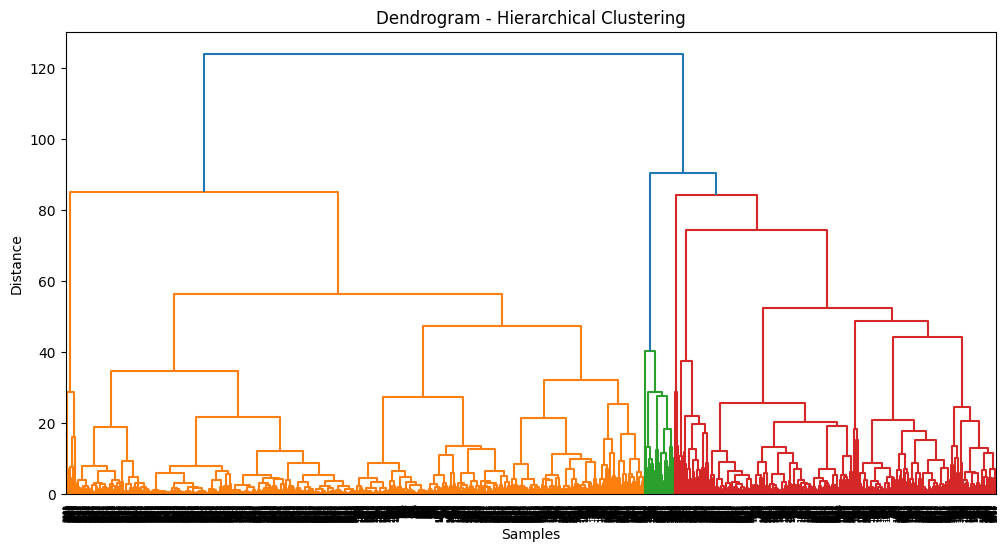

In [15]:
# Step 9: Hierarchical Clustering Dendrogram
linkage_matrix = linkage(scaled_df, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [16]:
# Step 10: Assign clusters from dendrogram
h_clusters = fcluster(linkage_matrix, 4, criterion='maxclust')  # Assuming 4 clusters
df['Hierarchical_Cluster'] = h_clusters


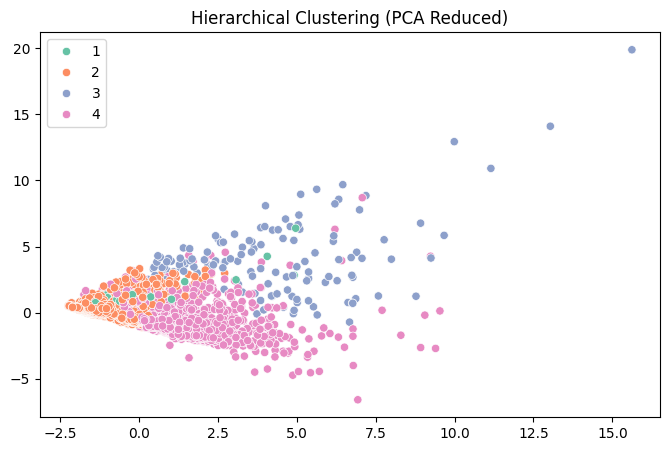

In [17]:
# Hierarchical Cluster Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=h_clusters, palette='Set2')
plt.title("Hierarchical Clustering (PCA Reduced)")
plt.show()


In [18]:
# Step 11: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(scaled_df)

df['DBSCAN_Cluster'] = db_labels


In [19]:
# Step 12: DBSCAN Evaluation
# Remove noise points (-1) before scoring
mask = db_labels != -1
score_dbscan = silhouette_score(scaled_df[mask], db_labels[mask]) if len(set(db_labels)) > 1 else "Not enough clusters"

print("Silhouette Score (DBSCAN):", score_dbscan)


Silhouette Score (DBSCAN): 0.29403795451062353


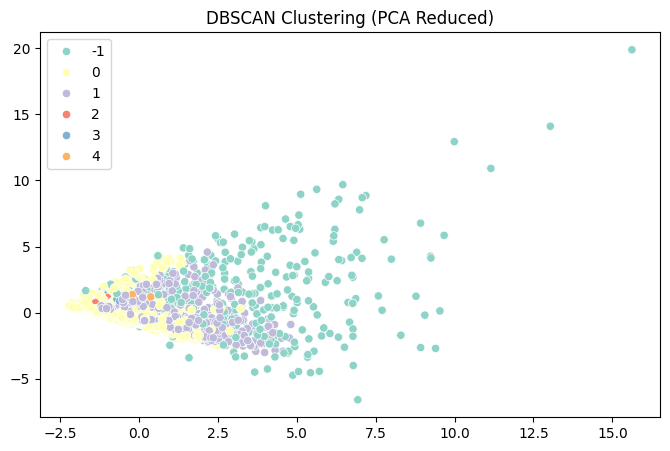

In [20]:
# DBSCAN Cluster Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=db_labels, palette='Set3')
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.show()


In [21]:
print("KMeans Clusters:\n", df['KMeans_Cluster'].value_counts())
print("\nHierarchical Clusters:\n", df['Hierarchical_Cluster'].value_counts())
print("\nDBSCAN Clusters:\n", df['DBSCAN_Cluster'].value_counts())


KMeans Clusters:
 KMeans_Cluster
3    1502
2    1236
1    1105
0     156
Name: count, dtype: int64

Hierarchical Clusters:
 Hierarchical_Cluster
2    2446
4    1380
3     130
1      43
Name: count, dtype: int64

DBSCAN Clusters:
 DBSCAN_Cluster
 0    2411
 1    1250
-1     310
 2      15
 3       8
 4       5
Name: count, dtype: int64
